## Import Libraries

In [1]:
# importing libraries
import numpy as np
import cv2
import os 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loaded data
image_names=[]
output=[]
labels=[]
benign = 0
malignant = 0
#define classes
classes={'Benign':0,"Malignant":1}  
for name in classes:
    address='/content/drive/MyDrive/Dataset_for_ML/BUS_Images/'+name
    for add in os.listdir(address):
            image = cv2.imread(address+'/'+add)
            image = cv2.resize(image, (128,128))
            image = cv2.normalize(image, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype =cv2.CV_8U)
            image_names.append(image)
            output.append(classes[name])
            if classes[name] == 0:
                benign = benign+1
            if classes[name] == 1:
                malignant = malignant + 1
            labels.append(name)               

In [4]:
# number of images
print("Benign Images :",benign)
print("Malignant Images :",malignant)
print("length of data =",len(image_names), "files=", len(output), "labels=",len(labels))

Benign Images : 437
Malignant Images : 210
length of data = 647 files= 647 labels= 647


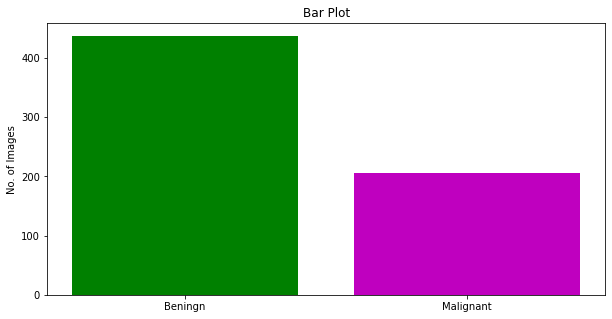

In [5]:
# plot the bar graph for number of benign and malignant images
fig = plt.figure(figsize = (10, 5))
k1=0
k2=0
for i in range (0,643):
    if output[i]==0:
        k1+=1
    else:
        k2+=1
plt.bar([0,1],[k1,k2], color = ['g','m'])
plt.xticks([0,1], ['Beningn', 'Malignant'])
plt.ylabel("No. of Images")
plt.title("Bar Plot") 
plt.show()

In [6]:
## function to plot sample images
def sample_images(images,gray = False):
    figure, axes = plt.subplots(1, 4)
    figure.set_size_inches(35,25)
    axes[0].imshow(images[1],cmap='gray') if gray else axes[0].imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
    axes[0].title.set_text("Benign")
    axes[0].axis('off')
    axes[1].imshow(images[55],cmap='gray') if gray else axes[1].imshow(cv2.cvtColor(images[55], cv2.COLOR_BGR2RGB))
    axes[1].title.set_text("Benign")
    axes[1].axis('off')
    axes[2].imshow(images[450],cmap='gray') if gray else axes[2].imshow(cv2.cvtColor(images[450], cv2.COLOR_BGR2RGB))
    axes[2].axis('off')
    axes[2].title.set_text("Malignant")
    axes[3].imshow(images[451],cmap='gray') if gray else axes[3].imshow(cv2.cvtColor(images[451], cv2.COLOR_BGR2RGB))
    axes[3].axis('off')
    axes[3].title.set_text("Malignant")
    plt.show()

In [7]:
# function to find the histogram of images
def hist(I):       #2D
    if len(I.shape)>2:
        I=cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
    H=np.zeros((256,1))
    for x in np.nditer(I):
        if x>255:
            x=255
        elif x<0:
            x=0
        H[int(x)]=H[int(x)]+1
    return H

In [8]:
## look for image shape and type of input images
input_images = image_names
print(np.array(input_images).shape)
print(input_images[10].dtype)

(647, 128, 128, 3)
uint8


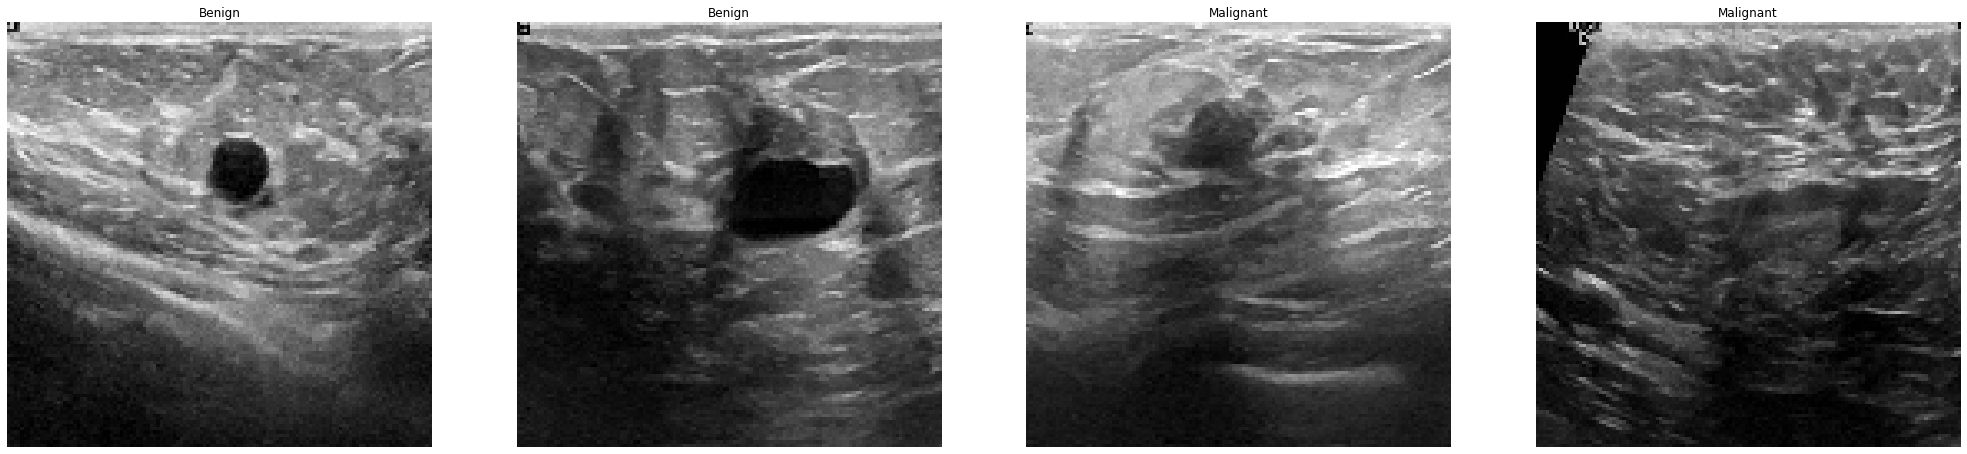

In [9]:
## plot the sample images
sample_images(input_images)

## Image Preprocessing

### Grayscale Image

647


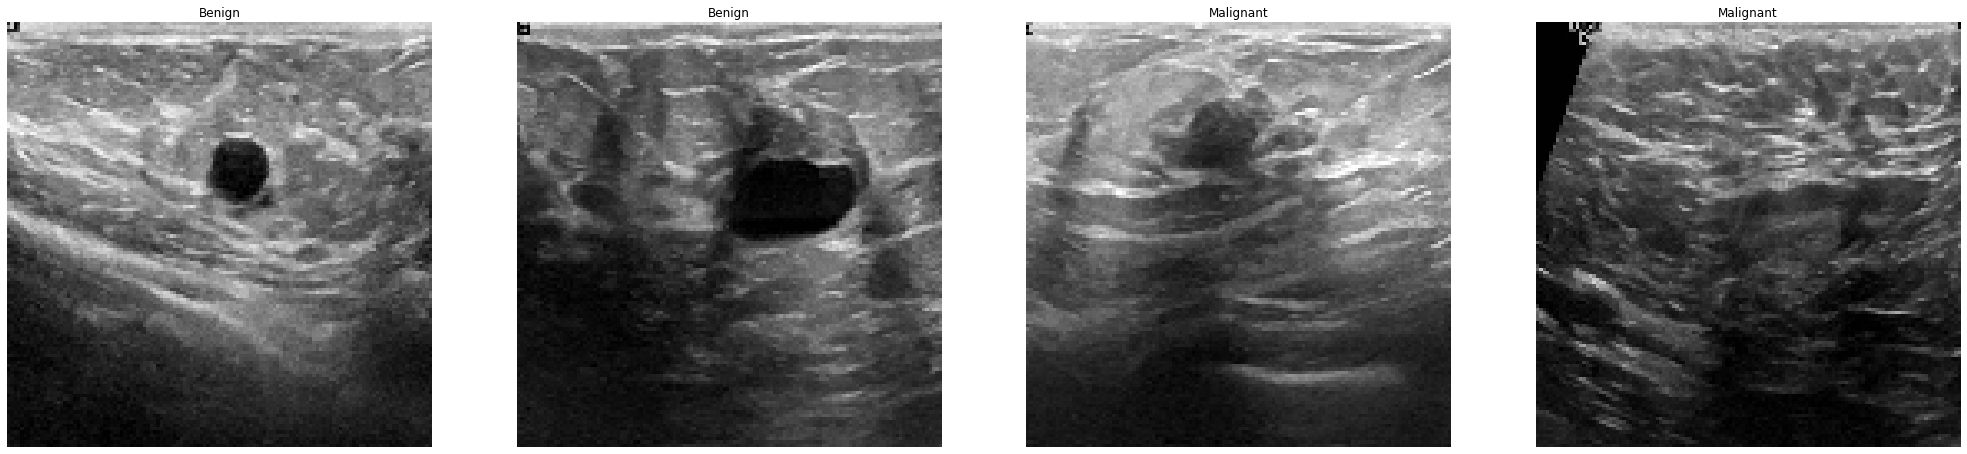

In [10]:
# convert the RBG images to gray scale images
grayscale_images = []
grayscale_images.clear()
for idx, image in enumerate(input_images,1):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    grayscale_images.append(gray_image)
print(idx)    
sample_images(grayscale_images)

Text(0.5, 1.0, 'histogram for malignant')

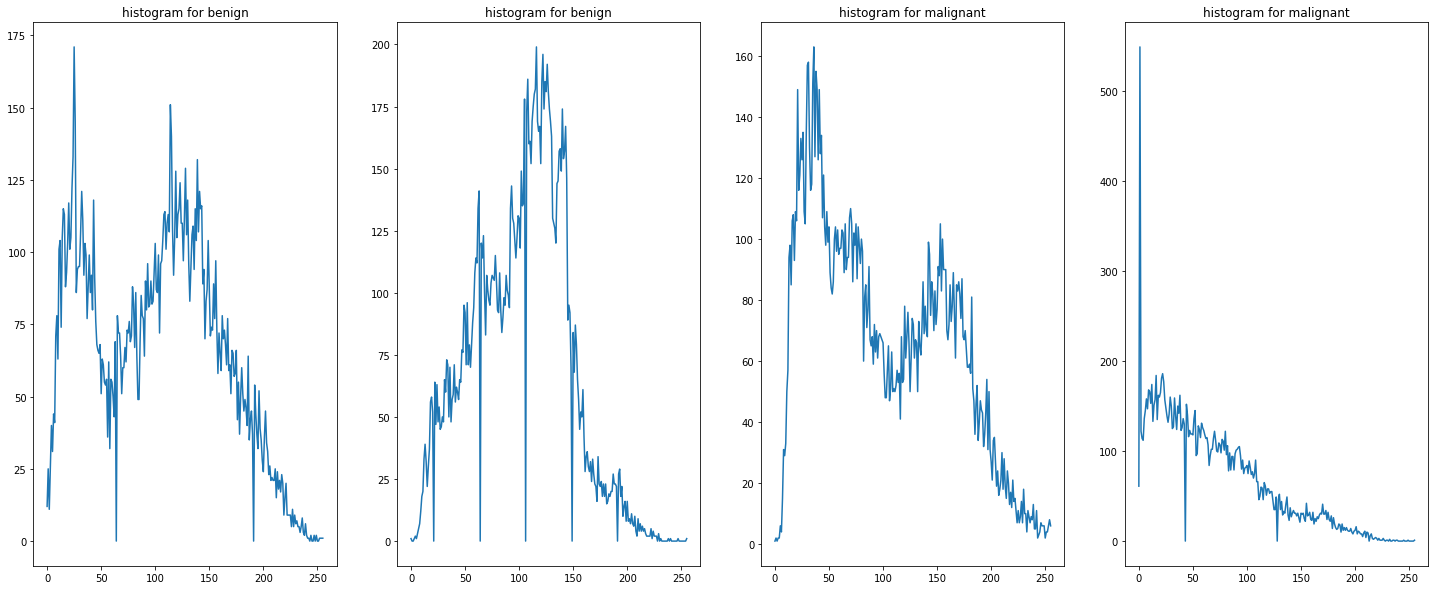

In [20]:
## plot for histogram equalization
fig = plt.figure(figsize=[25,10])
plt.subplot(1,4,1)
plt.plot(hist(grayscale_images[1]))
plt.title('histogram for benign')
plt.subplot(1,4,2)
plt.plot(hist(grayscale_images[50]))
plt.title('histogram for benign')
plt.subplot(1,4,3)
plt.plot(hist(grayscale_images[450]))
plt.title('histogram for malignant')
plt.subplot(1,4,4)
plt.plot(hist(grayscale_images[451]))
plt.title('histogram for malignant')

### Histogram Equalization

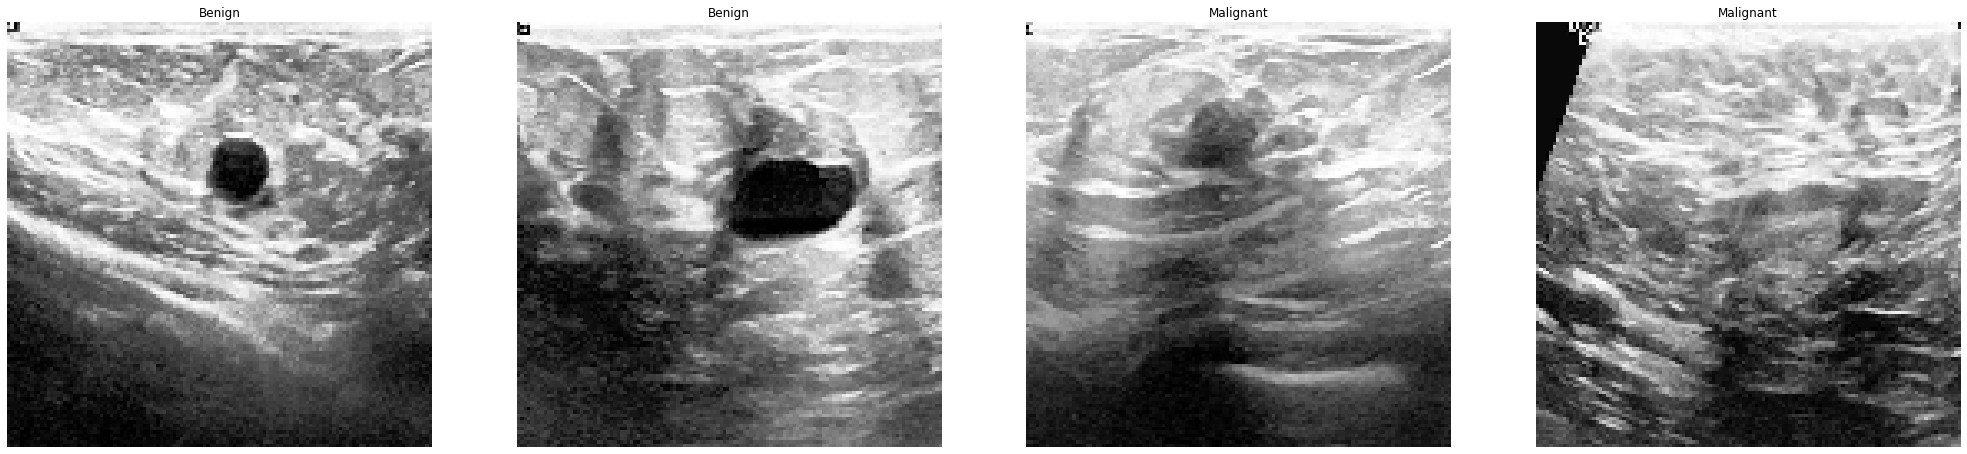

In [21]:
# histogram equalization on gray scale images
eqhist_images=[]
eqhist_images.clear()
for idx, image in enumerate(grayscale_images):
    eqhistimage = cv2.equalizeHist(image)
    eqhist_images.append(eqhistimage)
sample_images(eqhist_images, True)

Text(0.5, 1.0, 'histogram for malignant')

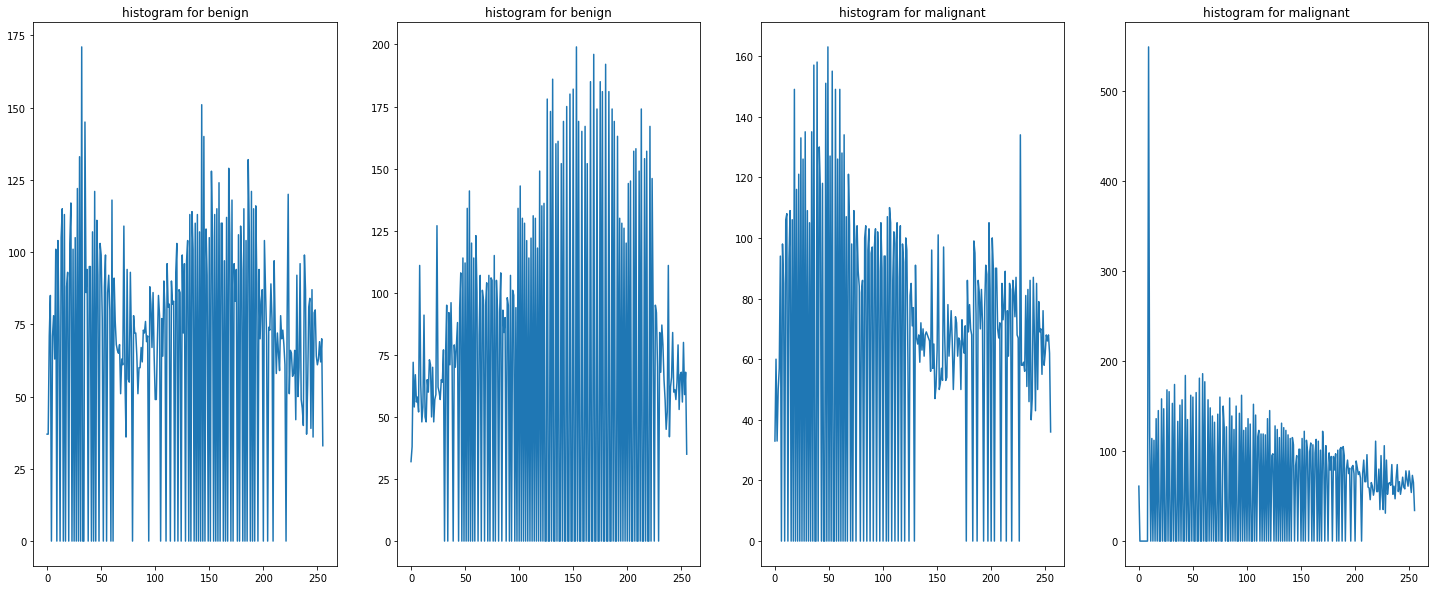

In [22]:
# plot the histogram after histogram operation
fig = plt.figure(figsize=[25,10])
plt.subplot(1,4,1)
plt.plot(hist(eqhist_images[1]))
plt.title('histogram for benign')
plt.subplot(1,4,2)
plt.plot(hist(eqhist_images[50]))
plt.title('histogram for benign')
plt.subplot(1,4,3)
plt.plot(hist(eqhist_images[450]))
plt.title('histogram for malignant')
plt.subplot(1,4,4)
plt.plot(hist(eqhist_images[451]))
plt.title('histogram for malignant')

### Bilateral Filter

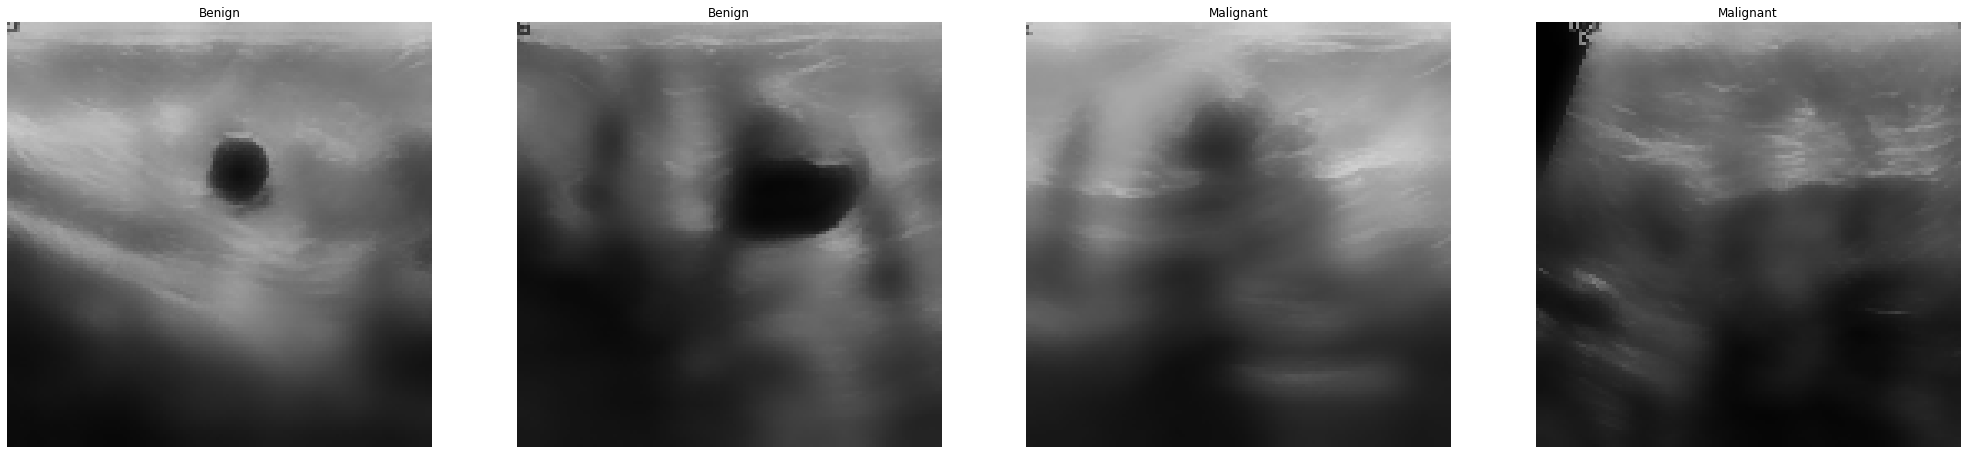

In [23]:
## Applying bilateral filter on grayscale images
bilateral_images = []
bilateral_images.clear()
for idx, image in enumerate(grayscale_images):
    bilateral = cv2.bilateralFilter(image, 15, 75, 75)
    bilateral_images.append(bilateral)
sample_images(bilateral_images)

Text(0.5, 1.0, 'histogram for malignant')

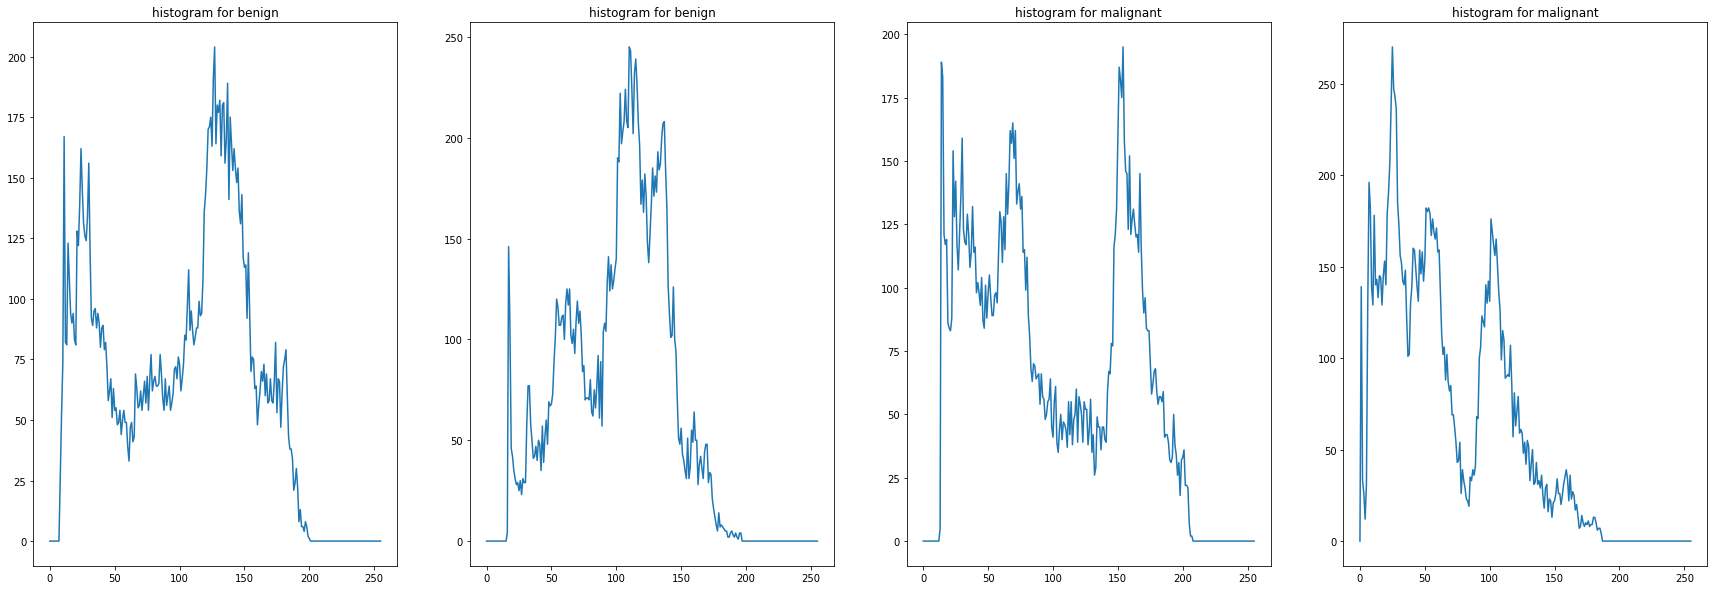

In [24]:
## plot the histogram of bilateral filter
fig = plt.figure(figsize=[30,10])
plt.subplot(1,4,1)
plt.plot(hist(bilateral_images[1]))
plt.title('histogram for benign')
plt.subplot(1,4,2)
plt.plot(hist(bilateral_images[50]))
plt.title('histogram for benign')
plt.subplot(1,4,3)
plt.plot(hist(bilateral_images[450]))
plt.title('histogram for malignant')
plt.subplot(1,4,4)
plt.plot(hist(bilateral_images[451]))
plt.title('histogram for malignant')

### CLAHE

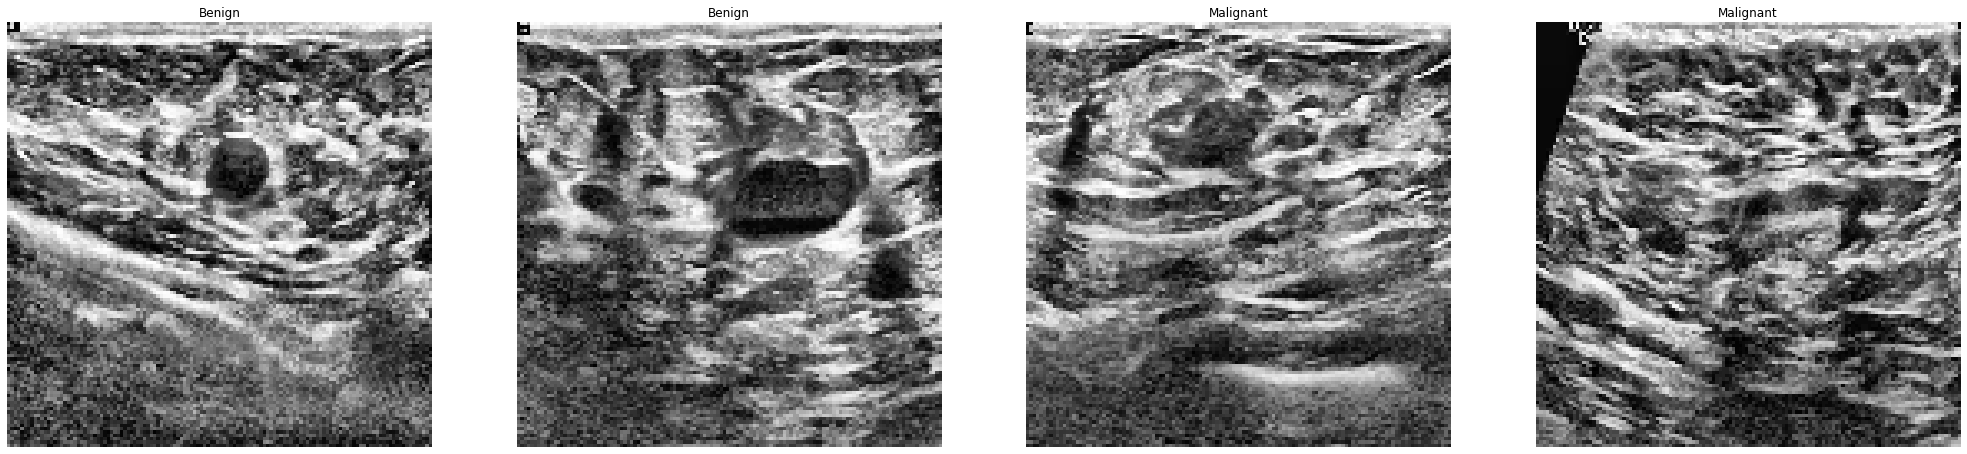

In [25]:
# applying clahe on grayscale images
Clahe_images=[]
Clahe_images.clear()
for idx, image in enumerate(grayscale_images):
    #R, G, B = cv2.split(image)
    
    clahe = cv2.createCLAHE(clipLimit = 5)
    clahe_img = clahe.apply(image) 
    Clahe_images.append(clahe_img)
sample_images(Clahe_images, True)

Text(0.5, 1.0, 'histogram for malignant')

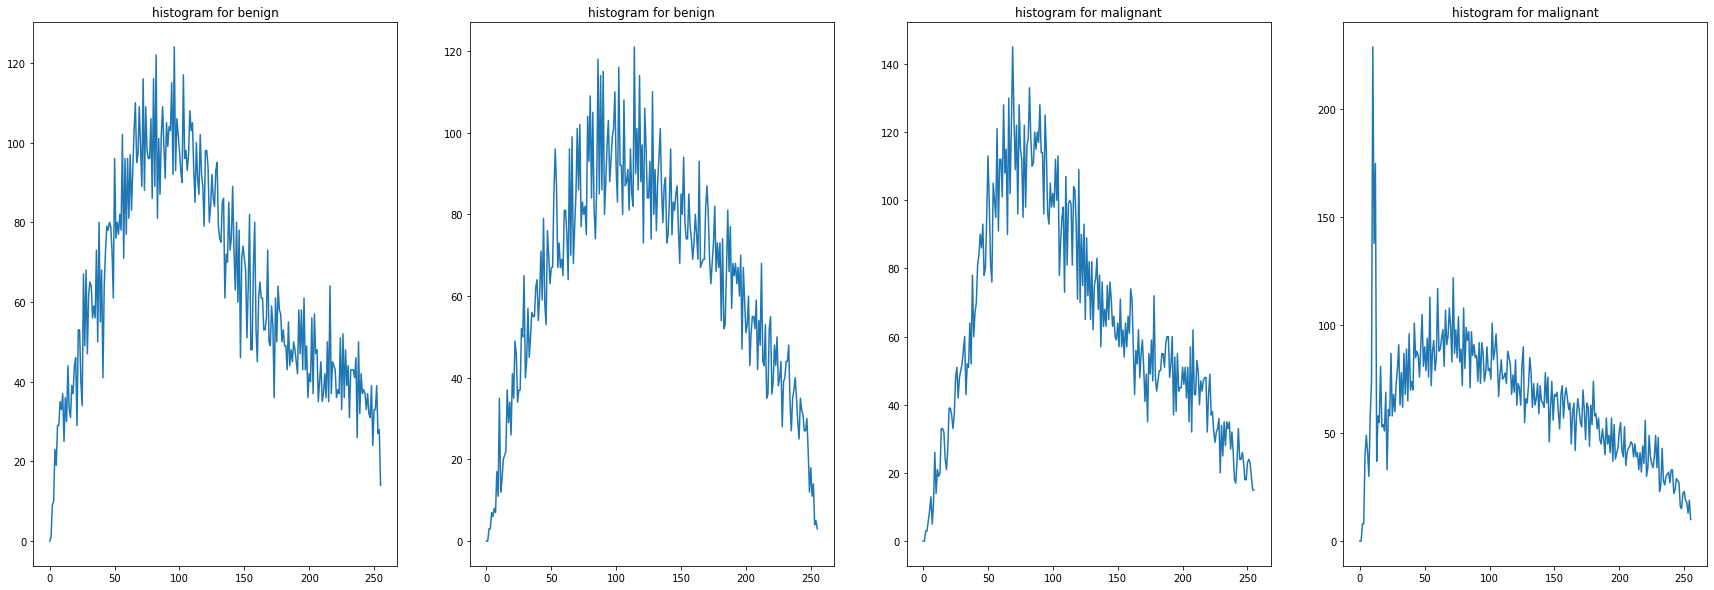

In [26]:
# plot the histogram after clahe operation
fig = plt.figure(figsize=[30,10])
plt.subplot(1,4,1)
plt.plot(hist(Clahe_images[1]))
plt.title('histogram for benign')
plt.subplot(1,4,2)
plt.plot(hist(Clahe_images[50]))
plt.title('histogram for benign')
plt.subplot(1,4,3)
plt.plot(hist(Clahe_images[450]))
plt.title('histogram for malignant')
plt.subplot(1,4,4)
plt.plot(hist(Clahe_images[451]))
plt.title('histogram for malignant')

### Otsu Binarization

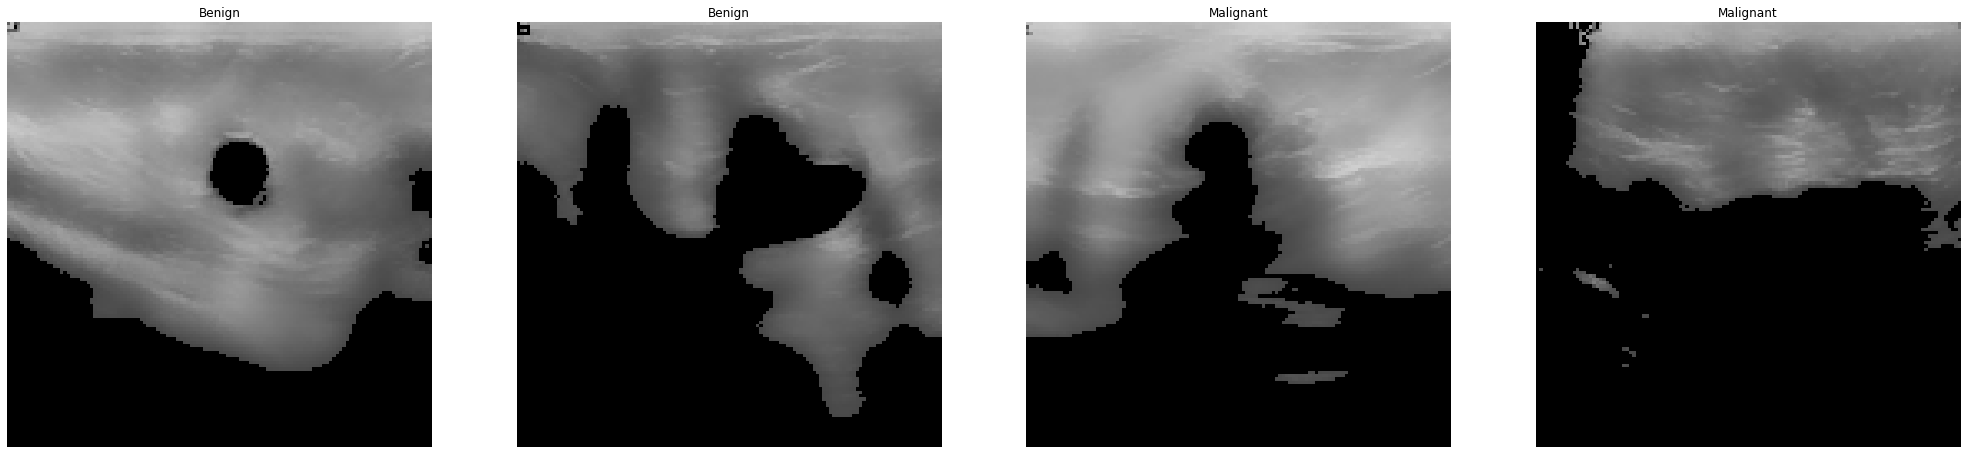

In [27]:
thresholded=[]
thresholded.clear()
for image in bilateral_images:
    thresh, binaryImg = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU)
    ret, image = cv2.threshold(image,thresh-20,255,cv2.THRESH_TOZERO)
    thresholded.append(image)
#(np.array(thresholded)).shape
sample_images(thresholded)


### Adaptive_Threshold¶

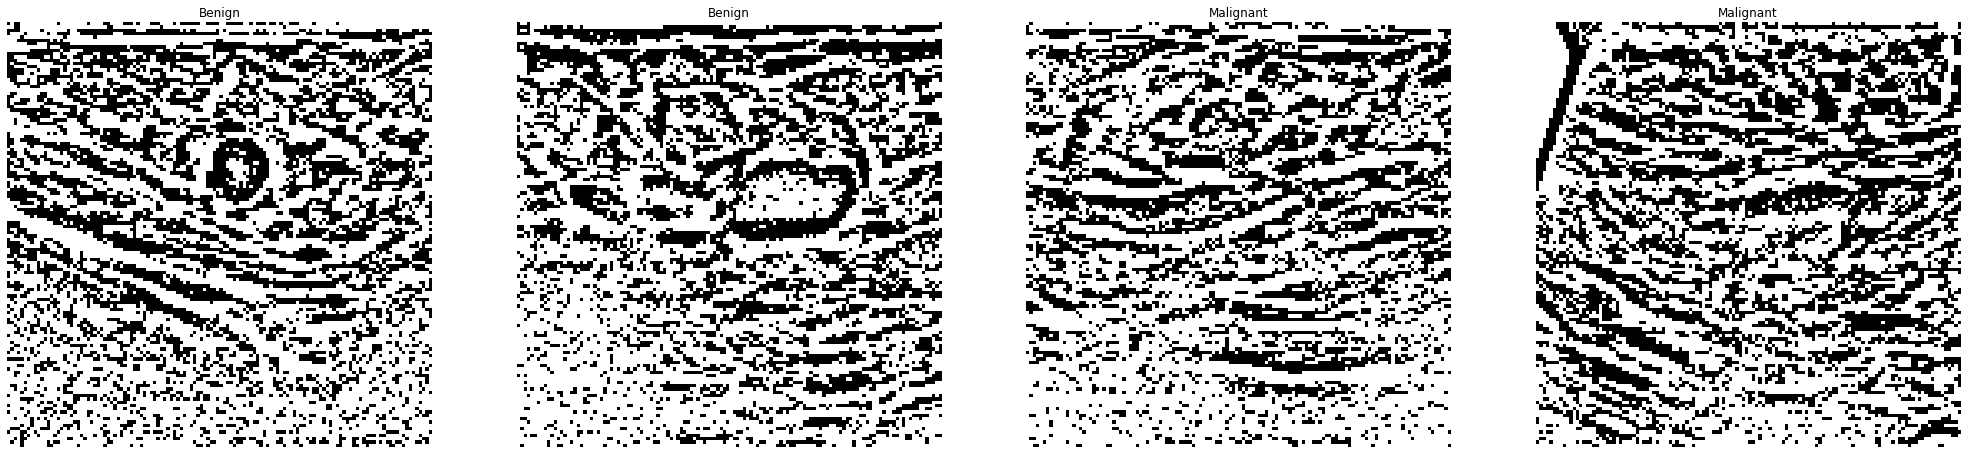

In [28]:
# Applied threshold to zero inversion
thresholded_images=[]
thresholded_images.clear()
for idx, image in enumerate(grayscale_images):
    image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 5)
    thresholded_images.append(image)
sample_images(thresholded_images, True)

## Edge Detection

### Sobel Edge Detection

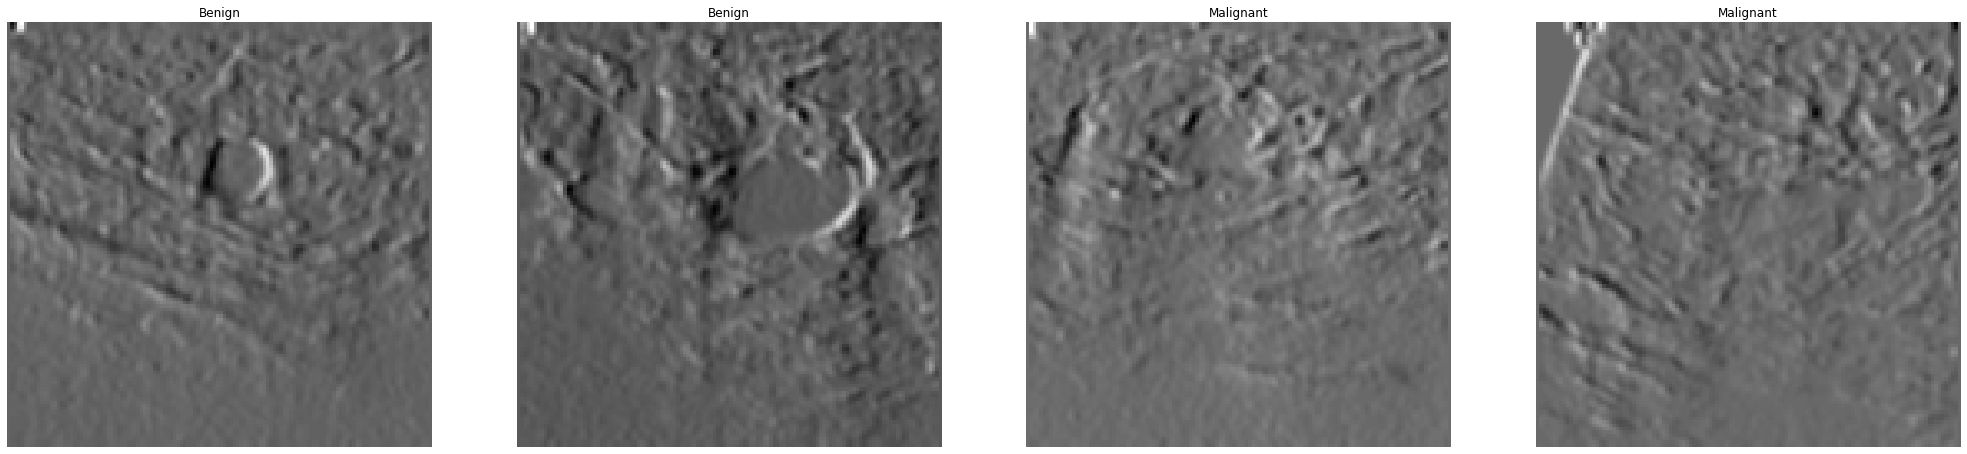

In [29]:
# Using sobel filter on grayscale images
x_edged_images=[]
x_edged_images.clear()
for idx, image in enumerate(grayscale_images):
    sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
    x_edged_images.append(sobelx)
sample_images(x_edged_images, True)

### Conny Edge Detection

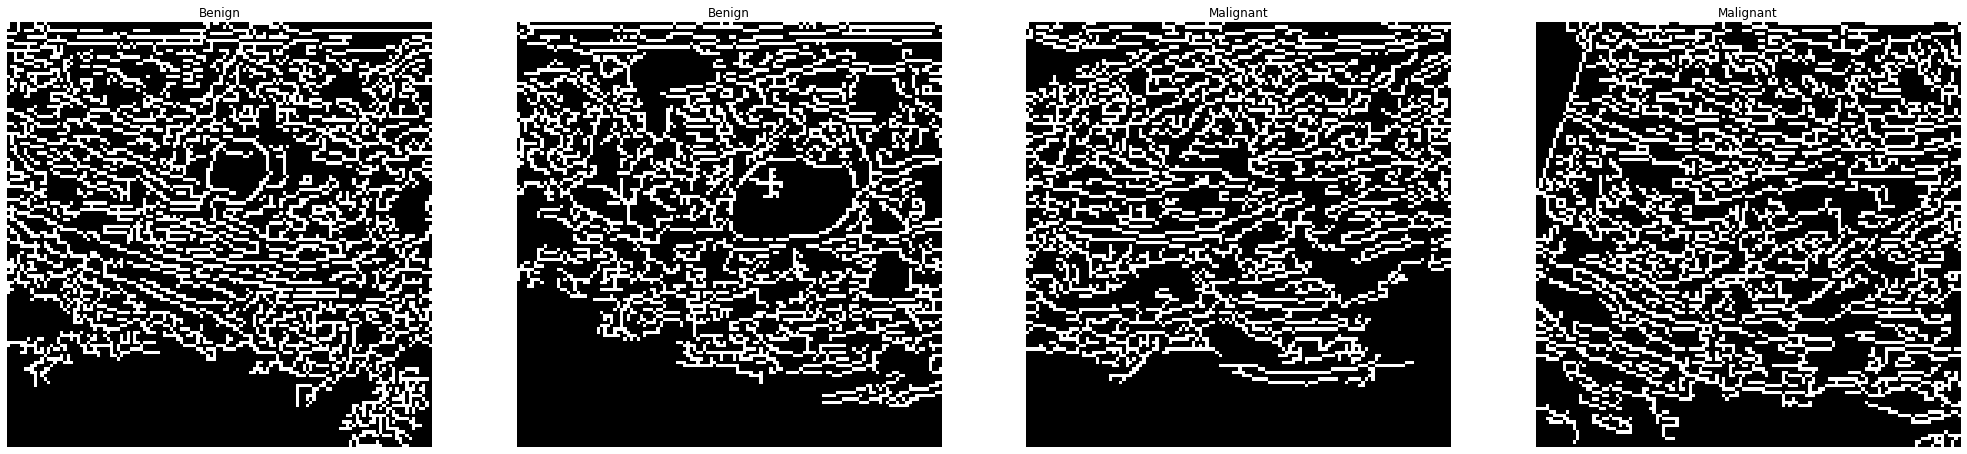

In [30]:
conny_edged_images=[]
conny_edged_images.clear()
for idx, image in enumerate(input_images):
    image = cv2.Canny(image,10,200)
    conny_edged_images.append(image)
sample_images(conny_edged_images, True)

## Morphological Operations

### Erosion

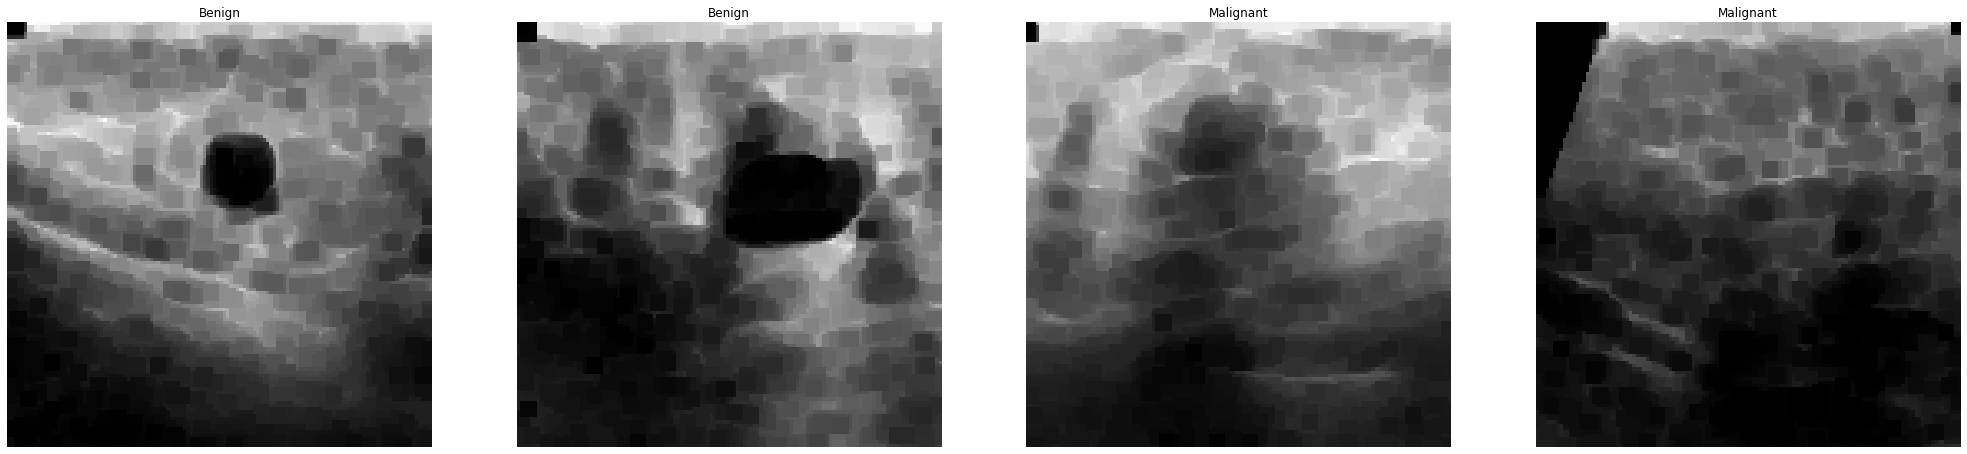

In [31]:
ero_images = []
ero_images.clear()
kernel = np.ones((5,5),np.uint8)
for idx, image in enumerate(grayscale_images):
    
    erosion = cv2.erode(image,kernel,iterations = 1)
    ero_images.append(erosion)
sample_images(ero_images, True)

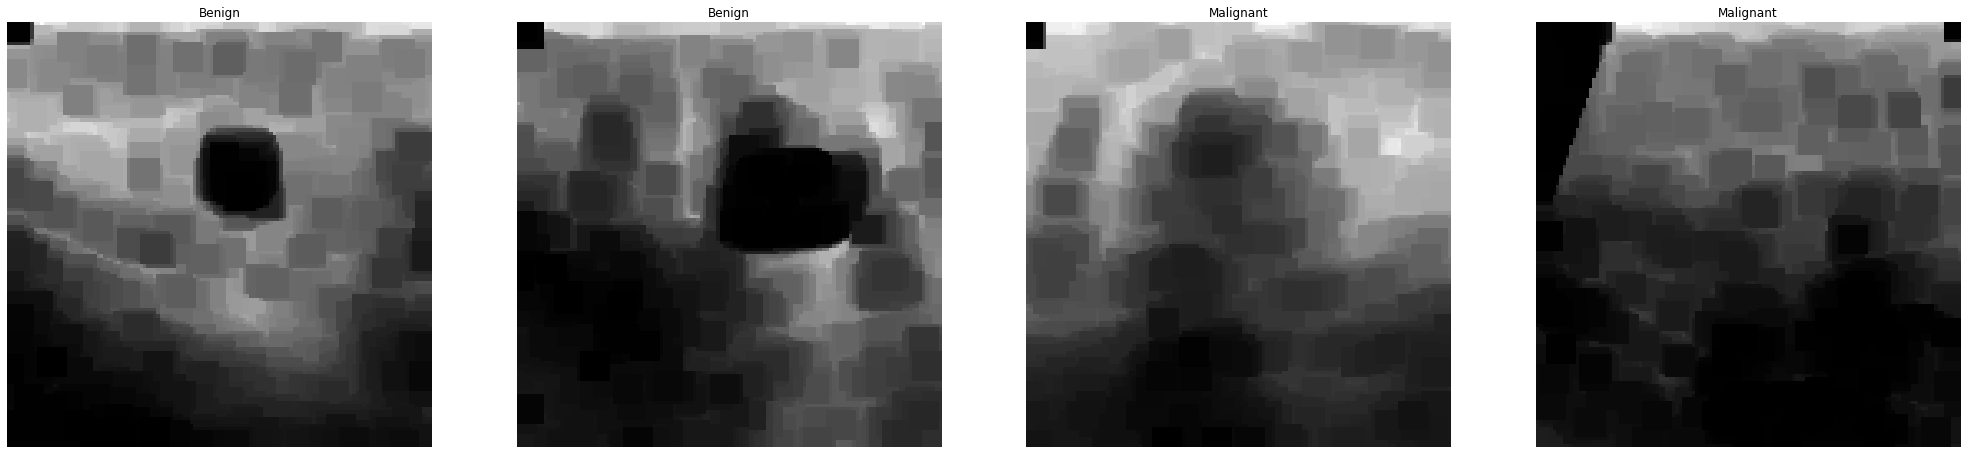

In [32]:
ero_images = []
ero_images.clear()
kernel = np.ones((3,3),np.uint8)
for idx, image in enumerate(grayscale_images):
    
    erosion = cv2.erode(image,kernel,iterations = 2)
    dilation = cv2.dilate(erosion,kernel,iterations = 1)
    erosion = cv2.erode(dilation,kernel,iterations = 2)
    dilation = cv2.dilate(erosion,kernel,iterations = 1)
    erosion = cv2.erode(dilation,kernel,iterations = 2)
    ero_images.append(erosion)
sample_images(ero_images, True)

## Dilation

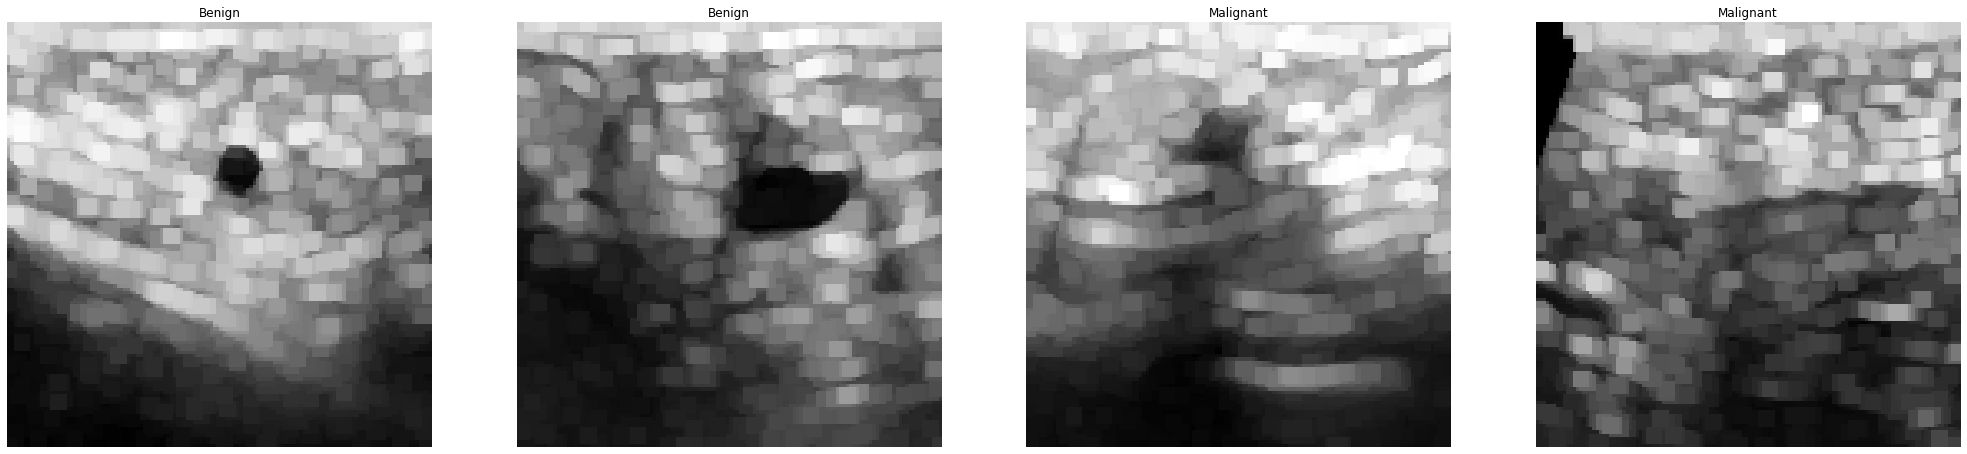

In [33]:
dilation_images = []
dilation_images.clear()
kernel = np.ones((5,5),np.uint8)
for idx, image in enumerate(grayscale_images):
    dilation = cv2.dilate(image,kernel,iterations = 1)
    dilation_images.append(dilation)
sample_images(dilation_images, True)

## Calculation Statistical and GLCM Features

In [37]:
# calculating the GLCM features
Energy = [];Correlation = [];Dissimilarity = [];Homogenity = [];Contrast = [];Entropy = []


from skimage.feature import greycomatrix, greycoprops
def energy(img):
            img = np.array(img)
            GLCM = greycomatrix(img, [1], [0])       
            return greycoprops(GLCM, 'energy')[0]
def correlation(img):
            img = np.array(img)
            GLCM = greycomatrix(img, [1], [0])      
            return greycoprops(GLCM, 'correlation')[0]
def dissimilarity(img):
            img = np.array(img)
            GLCM = greycomatrix(img, [1], [0])       
            return  greycoprops(GLCM, 'dissimilarity')[0]
def homogenity(img):
            img = np.array(img)
            GLCM = greycomatrix(img, [1], [0])       
            return  greycoprops(GLCM, 'homogeneity')[0]
def contrast(img):
            img = np.array(img)
            GLCM = greycomatrix(img, [1], [0])   
            return greycoprops(GLCM, 'contrast')[0]
def entropy(img):
            img = np.array(img)
            GLCM = greycomatrix(img, [1], [0])   
            return greycoprops(GLCM, 'entropy')[0]        
for img in input_images:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    Energy.append(energy(img)[0])
    Correlation.append(correlation(img)[0])
    Dissimilarity.append(dissimilarity(img)[0])
    Homogenity.append(homogenity(img)[0])
    Contrast.append(contrast(img)[0])
    Entropy.append(contrast(img)[0]) 

In [38]:
## mean and standard deviation of grayscale images
gray_mean=[]
gray_std_dev=[]
gray_mean.clear()
gray_std_dev.clear()
for idx, image in enumerate(grayscale_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    gray_mean.append(mean)
    gray_std_dev.append(std_dev)

In [39]:
## calculating mean and standard deviation of histogram equalization images
Histeq_mean=[]
Histeq_std=[]
Histeq_mean.clear()
Histeq_std.clear()
for image in eqhist_images:
    Histeq_mean.append(np.mean(image))
    Histeq_std.append(np.std(image))

In [40]:
## mean and standard deviation of clahe images
clahe_mean=[]
clahe_std_dev=[]
clahe_mean.clear()
clahe_std_dev.clear()
for idx, image in enumerate(Clahe_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    clahe_mean.append(mean)
    clahe_std_dev.append(std_dev)

In [41]:
## mean and standard deviation of adative histogram equalization images
adaptive_mean=[]
adaptive_std_dev=[]
adaptive_mean.clear()
adaptive_std_dev.clear()
for idx, image in enumerate(thresholded):
    mean = np.mean(image)
    std_dev = np.std(image)
    adaptive_mean.append(mean)
    adaptive_std_dev.append(std_dev)

In [42]:
## mean and standard deviation of clahe images
sobel_mean=[]
sobel_std_dev=[]
sobel_mean.clear()
sobel_std_dev.clear()
for idx, image in enumerate(x_edged_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    sobel_mean.append(mean)
    sobel_std_dev.append(std_dev)

In [43]:
## calculating mean and standard deviation of erosed images 
er_mean=[]
er_std_dev=[]
er_mean.clear()
er_std_dev.clear()
for idx, image in enumerate(ero_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    er_mean.append(mean)
    er_std_dev.append(std_dev)

In [44]:
# calculating the mean and standard deviation of dilated images
dl_mean=[]
dl_mean.clear()
dl_std_dev=[]
dl_std_dev.clear()
for idx, image in enumerate(dilation_images):
    mean = np.mean(image)
    std_dev = np.std(image) 
    dl_mean.append(mean)
    dl_std_dev.append(std_dev)

In [45]:
a = pd.DataFrame({'gray_mean':gray_mean})
b = pd.DataFrame({'gray_std_dev':gray_std_dev})
c = pd.DataFrame({'adaptive_mean':adaptive_mean})
d = pd.DataFrame({'adaptive_std_dev':adaptive_std_dev})
e = pd.DataFrame({'clahe_mean':clahe_mean})
f = pd.DataFrame({'clahe_std_dev':clahe_std_dev})
g = pd.DataFrame({'sobel_std_dev':sobel_std_dev})
h = pd.DataFrame({'sobel_mean':sobel_mean})
i = pd.DataFrame({'er_mean':er_mean})
j = pd.DataFrame({'er_std_dev':er_std_dev})
k = pd.DataFrame({'Histeq_mean':Histeq_mean})
l = pd.DataFrame({'Histeq_std':Histeq_std})
m = pd.DataFrame({'dl_mean':dl_mean})
n = pd.DataFrame({'dl_std_dev':dl_std_dev})
o = pd.DataFrame({'Entropy':Entropy})
p = pd.DataFrame({'Energy':Energy})
q = pd.DataFrame({'Correlation':Correlation})
r = pd.DataFrame({' Dissimilarity': Dissimilarity})
s = pd.DataFrame({'Homogenity':Homogenity})
t = pd.DataFrame({'Contrast':Contrast})
z = pd.DataFrame({'label':output})

In [46]:
# Make a list of all features aand concenate it.
pdList = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,z]  
data = pd.concat(pdList,axis=1)

In [47]:
## printing the top 5 rows
data.head()

,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev,label
0,103.029175,56.943825,91.247314,65.940766,119.878357,62.012814,686.080745,14.801392,64.806885,41.265105,128.155884,73.607984,137.992615,64.899056,0
1,100.528931,57.147003,89.181702,65.188389,117.783813,62.524257,768.352665,-1.789062,60.226990,39.312144,128.103699,73.563143,135.428223,67.539455,0
2,131.831543,58.489124,122.543152,67.376925,121.710510,62.081070,699.631668,-10.668152,90.185242,41.484515,128.179871,73.637883,170.387573,66.907190,0
3,67.179443,46.795611,39.638000,55.406357,110.589355,61.446318,677.245957,35.041443,31.625305,26.715831,126.623413,74.436976,102.768127,56.280452,0
4,89.999512,55.914144,78.280945,62.648283,114.635681,64.594976,716.087909,13.080322,48.491882,37.065806,127.855713,73.655765,122.895813,63.258016,0


In [48]:
# check the features,Non-null count and Dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gray_mean         647 non-null    float64
 1   gray_std_dev      647 non-null    float64
 2   adaptive_mean     647 non-null    float64
 3   adaptive_std_dev  647 non-null    float64
 4   clahe_mean        647 non-null    float64
 5   clahe_std_dev     647 non-null    float64
 6   sobel_std_dev     647 non-null    float64
 7   sobel_mean        647 non-null    float64
 8   er_mean           647 non-null    float64
 9   er_std_dev        647 non-null    float64
 10  Histeq_mean       647 non-null    float64
 11  Histeq_std        647 non-null    float64
 12  dl_mean           647 non-null    float64
 13  dl_std_dev        647 non-null    float64
 14  label             647 non-null    int64  
dtypes: float64(14), int64(1)
memory usage: 75.9 KB


In [49]:
## finding the features mean, std,min and max
data.describe()

,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev,label
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,85.083744,53.296231,68.772350,61.426807,111.913174,62.474389,671.775695,4.210930,49.907745,35.956076,128.487764,72.942195,118.473160,63.214528,0.324575
std,19.347408,8.315717,22.818981,9.177024,10.551806,3.461401,115.122862,28.874529,15.885336,8.855516,1.938255,2.261114,22.733462,9.300889,0.468578
min,35.513428,32.714985,13.970215,31.795113,66.819397,52.943908,331.502165,-114.169495,8.727844,16.298624,118.381104,46.962254,58.447327,39.435408,0.000000
25%,72.974915,47.385573,53.014160,55.430138,107.102783,60.056927,599.387970,-13.634186,38.365662,29.486540,128.097839,73.218906,104.102234,56.659845,0.000000
50%,85.138550,53.153555,68.565002,61.467460,113.661926,62.297003,667.108801,3.514221,48.747253,35.886872,128.250549,73.424828,118.830688,63.483293,0.000000
75%,98.353271,59.471588,85.837128,68.132799,119.347534,64.576757,741.606632,21.228180,60.877686,42.072174,128.419861,73.555829,133.779022,69.707905,1.000000
max,136.471130,75.082079,132.718933,86.802676,128.561768,73.200720,1040.223483,96.741272,91.972656,60.875059,153.461975,78.364629,174.076111,85.731138,1.000000


            Target Variable Distribution           


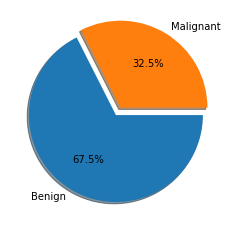

In [50]:
#Let us first analyze the distribution of the target variable
target = 'label'
labels = ['Benign','Malignant']
features = [i for i in data.columns.values if i not in [target]]
MAP={}
for e, i in enumerate(sorted(data[target].unique())):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
data1 = data.copy()
data1[target]=data1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(data1[target].value_counts(), labels=data1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

                                     Features Distribution                                      


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

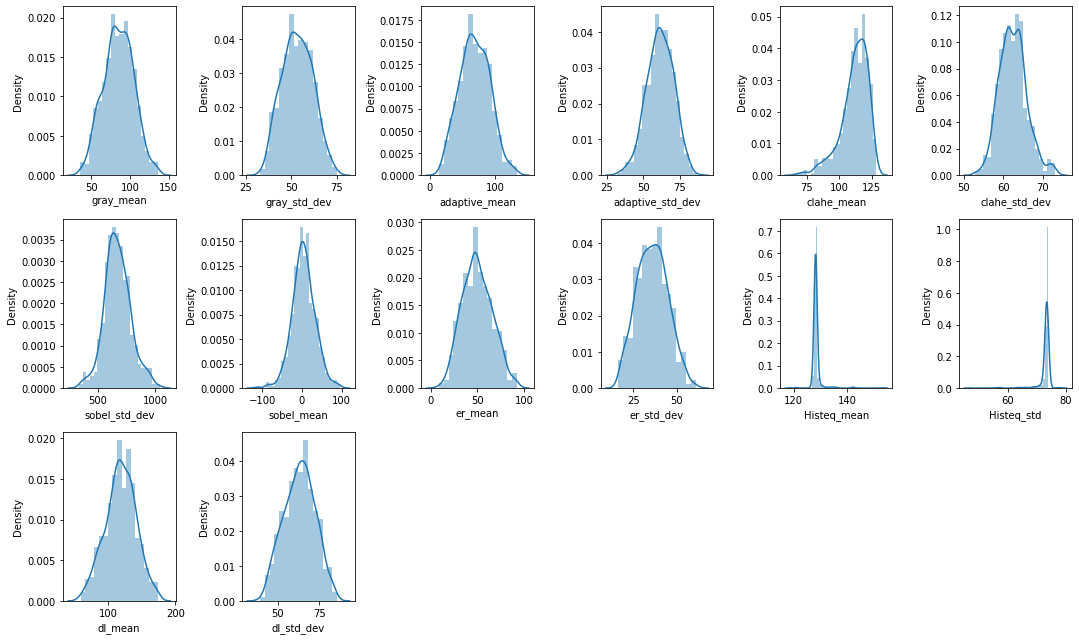

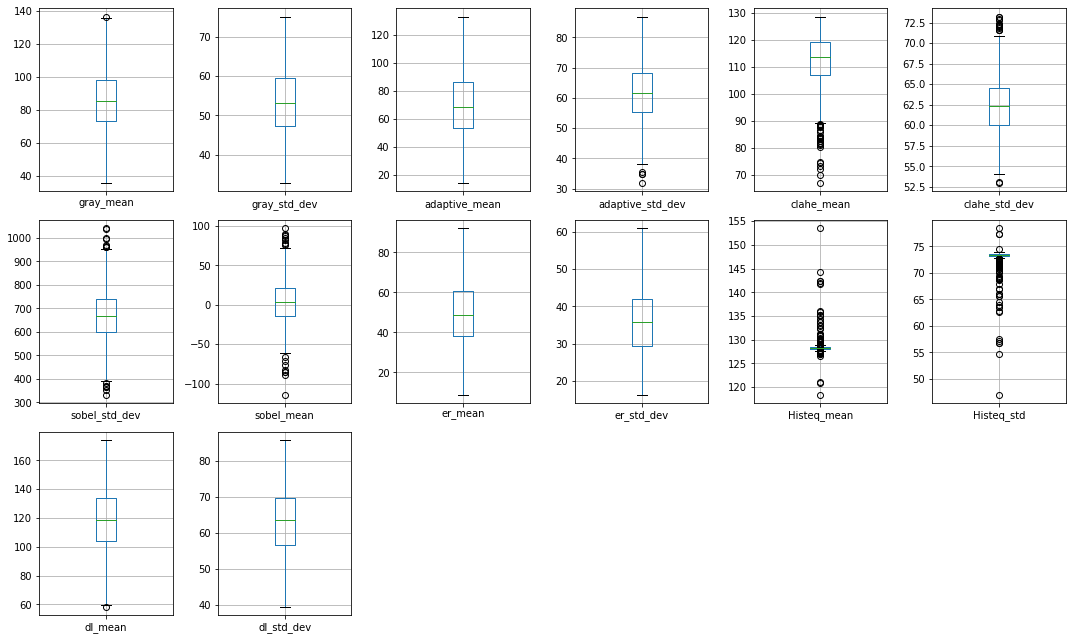

In [52]:
import math
import seaborn as sns
print('\033[1mFeatures Distribution'.center(100))
cf = []
#Checking number of unique rows in each feature

nu = data[features].nunique().sort_values()
nf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(data[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])
for i in range(data[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])
n=6
nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    sns.distplot(data[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    data.boxplot(nf[c])
plt.tight_layout()
plt.show()

In [53]:
#Check for empty elements
nvc = pd.DataFrame(data1.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/data1.shape[0],3)*100
print(nvc)

                  Total Null Values  Percentage
gray_mean                         0         0.0
gray_std_dev                      0         0.0
adaptive_mean                     0         0.0
adaptive_std_dev                  0         0.0
clahe_mean                        0         0.0
clahe_std_dev                     0         0.0
sobel_std_dev                     0         0.0
sobel_mean                        0         0.0
er_mean                           0         0.0
er_std_dev                        0         0.0
Histeq_mean                       0         0.0
Histeq_std                        0         0.0
dl_mean                           0         0.0
dl_std_dev                        0         0.0
label                             0         0.0


In [54]:
# Removal of outlier:
data2 = data1.copy()

for i in [i for i in data2.columns]:
    if data2[i].nunique()>=12:
        Q1 = data2[i].quantile(0.15)
        Q3 = data2[i].quantile(0.85)
        IQR = Q3 - Q1
        data2 = data2[data2[i] <= (Q3+(1.5*IQR))]
        data2 = data2[data2[i] >= (Q1-(1.5*IQR))]
data2 = data2.reset_index(drop=True)
display(data2.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(data1.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(data2.shape[0]))

,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev,label
0,103.029175,56.943825,91.247314,65.940766,119.878357,62.012814,686.080745,14.801392,64.806885,41.265105,128.155884,73.607984,137.992615,64.899056,Benign
1,100.528931,57.147003,89.181702,65.188389,117.783813,62.524257,768.352665,-1.789062,60.226990,39.312144,128.103699,73.563143,135.428223,67.539455,Benign
2,131.831543,58.489124,122.543152,67.376925,121.710510,62.081070,699.631668,-10.668152,90.185242,41.484515,128.179871,73.637883,170.387573,66.907190,Benign
3,89.999512,55.914144,78.280945,62.648283,114.635681,64.594976,716.087909,13.080322,48.491882,37.065806,127.855713,73.655765,122.895813,63.258016,Benign
4,70.791931,48.299823,50.783020,55.654917,108.682739,62.276226,669.808753,10.833740,37.088318,25.860675,128.434204,73.271824,106.367188,64.291310,Benign



Inference: Before removal of outliers, The dataset had 647 samples.
Inference: After removal of outliers, The dataset now has 579 samples.


In [56]:
#Splitting the data intro training & testing sets
from sklearn.model_selection import train_test_split
data = data2.copy()
X = data.drop([target],axis=1)
Y = data[target]
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',x_train.shape,y_train.shape,'\nTesting set   ---> ', x_test.shape,'', y_test.shape)

Original set  --->  (579, 14) (579,) 
Training set  --->  (463, 14) (463,) 
Testing set   --->  (116, 14)  (116,)


In [57]:
# Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
std = StandardScaler()
print('\033[1mStandardardization on Training set'.center(100))
x_train = std.fit_transform(x_train)
X_train = pd.DataFrame(x_train, columns=X.columns)
display(X_train.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
x_test = std.transform(x_test)
X_test = pd.DataFrame(x_test, columns=X.columns)
display(X_test.describe())

                               Standardardization on Training set                               


,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev
count,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02
mean,4.795780e-17,-5.064343e-16,-1.899129e-16,-3.951723e-16,-7.136120e-16,-1.266086e-15,-1.237311e-16,2.685637e-17,8.440572e-17,-3.836624e-17,3.630597e-14,-2.848310e-14,3.184398e-16,1.135641e-15
std,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00
min,-2.401963e+00,-2.529681e+00,-2.331613e+00,-3.446343e+00,-4.125481e+00,-3.001386e+00,-2.802081e+00,-3.185375e+00,-2.461169e+00,-2.307002e+00,-3.875180e+00,-3.864889e+00,-2.710107e+00,-2.531728e+00
25%,-6.689641e-01,-7.330460e-01,-7.005826e-01,-6.699792e-01,-5.895923e-01,-7.510684e-01,-6.731152e-01,-6.144087e-01,-6.475907e-01,-7.449848e-01,-3.161599e-01,-4.229135e-01,-6.630489e-01,-7.017730e-01
50%,-2.801031e-02,1.887659e-02,-6.211024e-02,2.141650e-02,1.162177e-01,1.992326e-02,-5.630363e-02,-2.911505e-02,-1.182906e-01,1.632152e-02,1.386012e-01,1.975765e-01,-5.136409e-02,3.171628e-02
75%,6.840107e-01,7.231056e-01,7.369411e-01,7.328635e-01,7.354073e-01,7.187971e-01,6.320959e-01,5.770705e-01,6.671196e-01,6.527572e-01,5.411828e-01,6.856525e-01,6.695171e-01,6.950439e-01
max,2.762228e+00,2.584421e+00,2.845320e+00,2.489198e+00,1.787757e+00,2.540566e+00,3.212521e+00,3.130689e+00,2.697430e+00,2.782923e+00,2.819971e+00,2.176311e+00,2.536755e+00,2.227593e+00



                                Standardardization on Testing set                                


,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,0.018747,0.115600,0.007239,0.084832,-0.016850,-0.028233,-0.158004,0.050261,0.031591,0.125109,0.018699,0.047305,-0.005635,0.097978
std,1.064799,1.185449,1.095946,1.196353,0.950122,0.893828,0.975325,0.855631,1.067800,1.201776,0.989495,0.955352,1.026024,1.090919
min,-2.116049,-2.187281,-2.309793,-3.111023,-2.595598,-2.129373,-3.109536,-1.794547,-2.131701,-2.133685,-3.033163,-2.587239,-2.270923,-2.334367
25%,-0.723383,-0.681937,-0.746101,-0.684277,-0.621060,-0.617476,-0.815783,-0.578065,-0.846087,-0.782093,-0.493946,-0.444783,-0.646886,-0.637144
50%,0.250007,-0.007969,0.221244,0.061901,-0.044289,-0.172679,-0.218123,-0.013120,0.059054,0.128925,0.059063,0.150929,0.020307,0.064250
75%,0.739206,1.030024,0.706635,0.945678,0.619011,0.632731,0.361334,0.595475,0.816360,0.937482,0.674922,0.650280,0.694109,0.902550
max,2.442918,2.753221,2.517894,2.880091,1.825225,1.859574,2.856686,2.426323,2.378333,2.936126,1.990928,2.349679,2.264460,2.542766


Test Accuracy Score of Basic Logistics Regression: 81.03
              precision    recall  f1-score   support

      Benign       0.81      0.94      0.87        78
   Malignant       0.81      0.55      0.66        38

    accuracy                           0.81       116
   macro avg       0.81      0.74      0.76       116
weighted avg       0.81      0.81      0.80       116



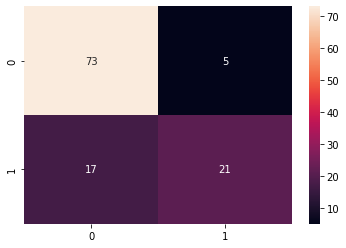

In [58]:
## Applying Logistic Regression Algorithm 
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=0)
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
test_accuracy1 = round(accuracy_score(y_test, y_pred1) * 100, 2)
print('Test Accuracy Score of Basic Logistics Regression:',test_accuracy1)
conf1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(conf1, annot=True)
print(classification_report(y_test,y_pred1))

Test Accuracy Random Forest is : 81.03448275862068 %
              precision    recall  f1-score   support

      Benign       0.80      0.96      0.87        78
   Malignant       0.86      0.50      0.63        38

    accuracy                           0.81       116
   macro avg       0.83      0.73      0.75       116
weighted avg       0.82      0.81      0.79       116



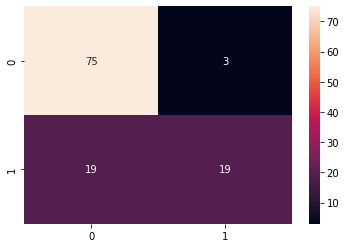

In [60]:
## Applying Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
model = RandomForestClassifier(n_estimators =100)
model.fit(x_train,y_train)
y_pred2 = model.predict(x_test)
print("Test Accuracy Random Forest is :",metrics.accuracy_score(y_pred2,y_test)*100,'%')
conf2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf2, annot=True)
print(classification_report(y_test,y_pred2))

Test Accuracy Score of KNN: 81.9
              precision    recall  f1-score   support

      Benign       0.81      0.96      0.88        78
   Malignant       0.87      0.53      0.66        38

    accuracy                           0.82       116
   macro avg       0.84      0.74      0.77       116
weighted avg       0.83      0.82      0.80       116



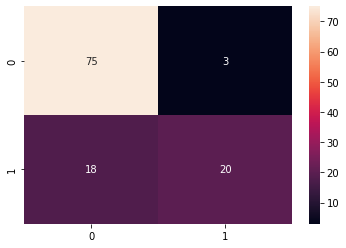

In [61]:
## Applying KNN Algorithm 
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=9 , metric= 'minkowski' , p = 4)
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)
test_accuracy3 = round(accuracy_score(y_test, y_pred3) * 100, 2)
print('Test Accuracy Score of KNN:',test_accuracy3)
conf3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(conf3, annot=True)
print(classification_report(y_test,y_pred3))

Test Accuracy Score of SVM : 81.03
              precision    recall  f1-score   support

      Benign       0.79      0.97      0.87        78
   Malignant       0.90      0.47      0.62        38

    accuracy                           0.81       116
   macro avg       0.85      0.72      0.75       116
weighted avg       0.83      0.81      0.79       116



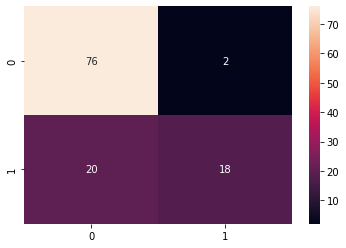

In [62]:
from sklearn.svm import SVC, LinearSVC
model4 = SVC()
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
test_accuracy4 = round(accuracy_score(y_test, y_pred4) * 100, 2)
print('Test Accuracy Score of SVM :',test_accuracy4)
conf4 = confusion_matrix(y_test, y_pred4)
sns.heatmap(conf4, annot=True)
print(classification_report(y_test,y_pred4))

Test Accuracy Score of Decision Tree is : 71.55
              precision    recall  f1-score   support

      Benign       0.80      0.77      0.78        78
   Malignant       0.56      0.61      0.58        38

    accuracy                           0.72       116
   macro avg       0.68      0.69      0.68       116
weighted avg       0.72      0.72      0.72       116



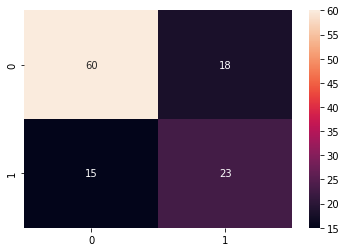

In [63]:
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier()
model5.fit(x_train,y_train)
y_pred5 = model5.predict(x_test)
test_accuracy5 = round(accuracy_score(y_test, y_pred5) * 100, 2)
print('Test Accuracy Score of Decision Tree is :',test_accuracy5)
conf5 = confusion_matrix(y_test, y_pred5)
sns.heatmap(conf5, annot=True)
print(classification_report(y_test,y_pred5))

Test Accuracy Score of Naive Bayes: 74.14
              precision    recall  f1-score   support

      Benign       0.83      0.77      0.80        78
   Malignant       0.59      0.68      0.63        38

    accuracy                           0.74       116
   macro avg       0.71      0.73      0.72       116
weighted avg       0.75      0.74      0.75       116



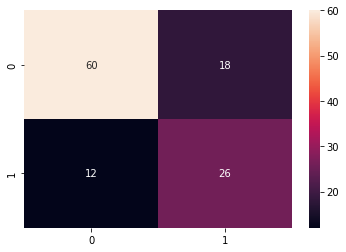

In [64]:
## Applying Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(x_train,y_train)
y_pred6 = model6.predict(x_test)
test_accuracy6 = round(accuracy_score(y_test, y_pred6) * 100, 2)
print('Test Accuracy Score of Naive Bayes:',test_accuracy6)
conf6 = confusion_matrix(y_test, y_pred6)
sns.heatmap(conf6, annot=True)
print(classification_report(y_test,y_pred6))

In [ ]:
##============================================THE END=========================================##